# **Time Series Analysis with Pandas**

Powerful time series tools in the pandas library

### **Focus: Data wrangling and visualization aspects of time series analysis**

In [0]:
# Import Libraries
import pandas as pd


DatetimeIndex object, is the core data structure that powers much of pandas time series functionality.

In [2]:
# Create timestamps from strings
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [4]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

In [5]:
# Alternatively we can use dayfirst to tell pandas to interpret the date as August 7, 1952
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

In [6]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [7]:
# If we’re dealing with a sequence of strings all in the same date/time format, 
# we can explicitly specify it with the format parameter.
# Below, we uses the format codes %m (numeric month), %d (day of month), 
# and %y (2-digit year) to specify the format.
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

In [10]:
# Load Dataset
ospd = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
ospd.shape

(4383, 5)

The DataFrame has 4383 rows, covering the period from January 1, 2006 through December 31, 2017.

In [11]:
ospd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [12]:
ospd.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [13]:
# Check the data types of each column
ospd.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [0]:
# convert the 'Date' column to datetime format 
ospd['Date']= pd.to_datetime(ospd['Date']) 

In [16]:
ospd.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [18]:
# Set the dataFrame's index at Date column
ospd = ospd.set_index('Date')
ospd.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [19]:
ospd.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [0]:
# Alternatively, we can consolidate the above steps into a single line, 
# using the index_col and parse_dates parameters of the read_csv() function. This is often a useful shortcut.
#
#ospd = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

#### **Individual Date/Time components**

Let’s add a few more columns to opsd_daily, containing the year, month, and weekday name.

In [20]:
# Add columns with year, month, and weekday name
ospd['Year'] = ospd.index.year
ospd['Month'] = ospd.index.month
ospd['Weekday Name'] = ospd.index.weekday_name
# Display a random sampling of 5 rows
ospd.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


## **Time-based indexing**

One of the most powerful and convenient features of pandas time series is **time-based indexing** — using dates and times to intuitively organize and access our data. With time-based indexing, we can use date/time formatted strings to select data in our DataFrame with the loc accessor.

In [21]:
# we can select data for a single day using a string such as '2017-08-10'.
ospd.loc['2017-08-10']

Consumption      1351.49
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday Name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

In [22]:
# We can also select a slice of days, such as '2014-01-20':'2014-01-22'. 
# As with regular label-based indexing with loc, the slice is inclusive of both endpoints
ospd.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


Another very handy feature of pandas time series is **partial-string indexing**, where we can select all date/times which partially match a given string. For example, we can select the entire year 2006 with opsd_daily.loc['2006'], or the entire month of February 2012 with opsd_daily.loc['2012-02'].

In [23]:
# Month of February
ospd.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


## **Visualizing time series data**


With pandas and matplotlib, we can easily visualize our time series data. In this section, we’ll cover a few examples and some useful customizations for our time series plots. First, let’s import matplotlib.

In [0]:
# Import matplotlib
import matplotlib.pyplot as plt

We’ll use seaborn styling for our plots.
Let’s adjust the default figure size to an appropriate shape for time series plots.

In [0]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

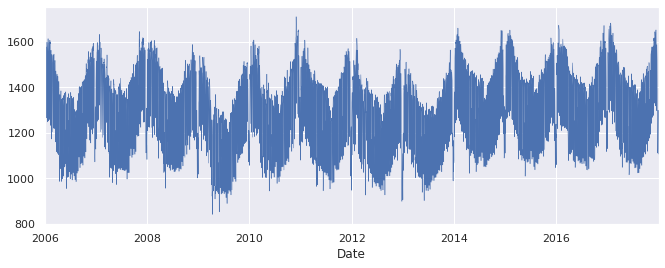

In [26]:
# Create a line plot of the full time series of Germany’s daily electricity consumption, 
# using the DataFrame’s plot() method.
ospd['Consumption'].plot(linewidth=0.5);

With so many data points, the line plot is crowded and hard to read. Let’s plot the data as dots instead, and also look at the Solar and Wind time series.

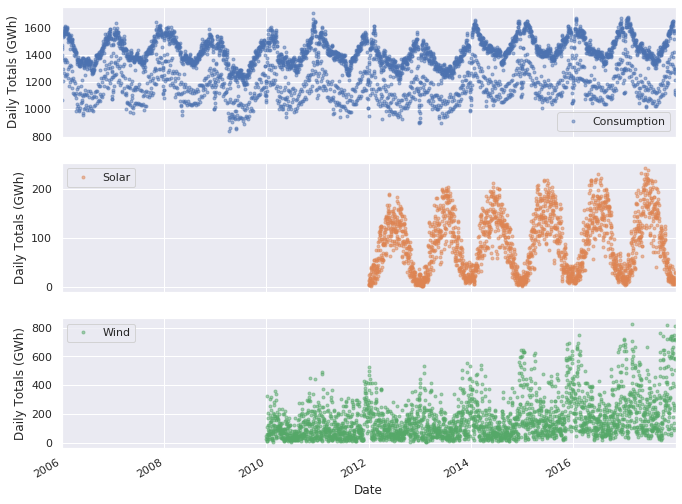

In [27]:
# Plot the data as dots, looking at the Solar and Wind time series.
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = ospd[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

We can already see some interesting patterns emerge:

1.   Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.
2.   Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. We might guess that these clusters correspond with weekdays and weekends, and we will investigate this further shortly.
3.   Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.
4.    Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.
5.    There appears to be a strong increasing trend in wind power production over the years.

All three time series clearly exhibit periodicity—often referred to as **seasonality** in time series analysis—in which a pattern repeats again and again at regular time intervals.

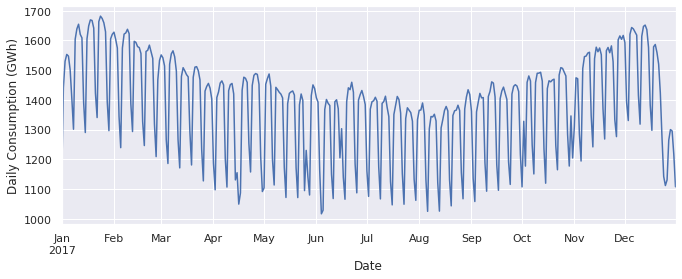

In [28]:
# Plot timeseries in a single year to investigate consumption
ax = ospd.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

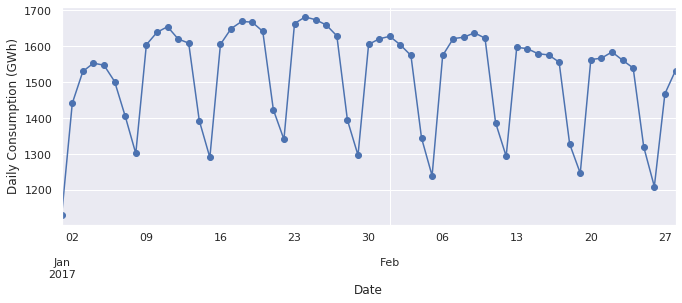

In [29]:
# Zooming in further and look at just January and February.
ax = ospd.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

As we suspected, consumption is highest on weekdays and lowest on weekends.

## **Customizing time series plots**

In [0]:
# Import matplotlib.dates 
# Ths will help us have a weekly timescale
import matplotlib.dates as mdates

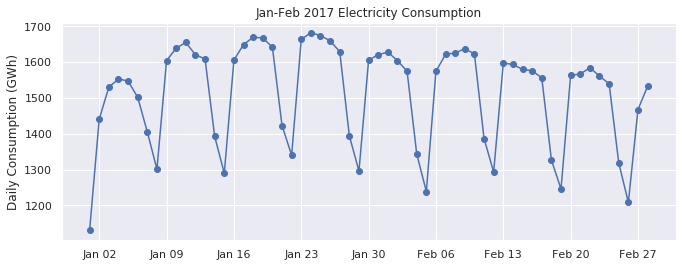

In [31]:
# Create the plot directly in matplotlib. 
# Then we use mdates.WeekdayLocator() and mdates.MONDAY to set the x-axis ticks to the first Monday of each week. 
# We also use mdates.DateFormatter() to improve the formatting of the tick labels
fig, ax = plt.subplots()
ax.plot(ospd.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

## **Seasonality**

Explore the seasonality of our data with box plots, using seaborn’s boxplot() function to group the data by different time periods and display the distributions for each group. We’ll first group the data by month, to visualize yearly seasonality.

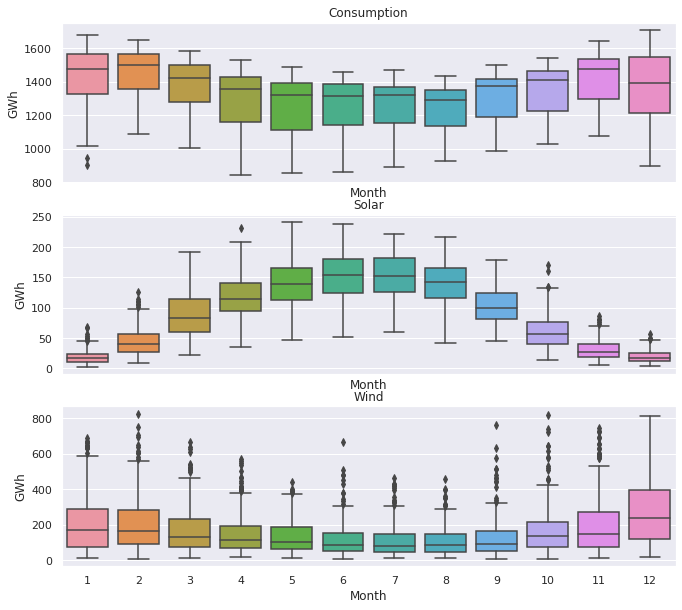

In [34]:
# Group the data by month, to visualize yearly seasonality
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
  sns.boxplot(data=ospd, x='Month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

These box plots confirm the yearly seasonality that we saw in earlier plots and provide some additional insights:
*   Although electricity consumption is generally higher in winter and lower in summer, the median and lower two quartiles are lower in December and January compared to November and February, likely due to businesses being closed over the holidays. We saw this in the time series for the year 2017, and the box plot confirms that this is consistent pattern throughout the years.
*   While solar and wind power production both exhibit a yearly seasonality, the wind power distributions have many more outliers, reflecting the effects of occasional extreme wind speeds associated with storms and other transient weather conditions.

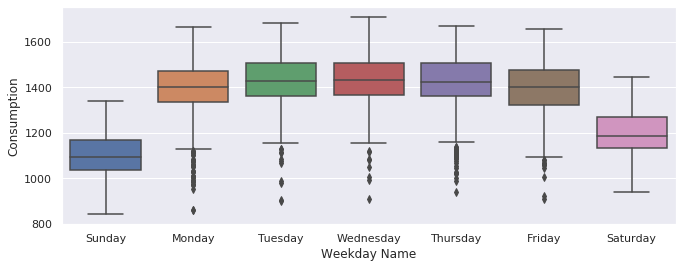

In [35]:
# Group the electricity consumption time series by day of the week, to explore weekly seasonality.
sns.boxplot(data=ospd, x='Weekday Name', y='Consumption');

As expected, electricity consumption is significantly higher on weekdays than on weekends. The low outliers on weekdays are presumably during holidays.

## **Frequencies**

When the data points of a time series are uniformly spaced in time (e.g., hourly, daily, monthly, etc.), the time series can be associated with a **frequency** in pandas

In [36]:
# use the date_range() function to create a sequence of uniformly spaced dates 
# from 1998-03-10 through 1998-03-15 at daily frequency.
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

The resulting DatetimeIndex has an attribute freq with a value of 'D', indicating daily frequency

In [37]:
# As another example, let’s create a date range at hourly frequency, 
# specifying the start date and number of periods, instead of the start date and end date
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [38]:
#  DatetimeIndex of our ospd time series.
ospd.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [39]:
# Create a new DataFrame which contains only the Consumption data for Feb 3, 6, and 8, 2013.
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
# Select the specified dates and just the Consumption column
consum_sample = ospd.loc[times_sample, ['Consumption']].copy()
consum_sample



,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [40]:
# use the asfreq() method to convert the DataFrame to daily frequency, 
#with a column for unfilled data, and a column for forward filled data

# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missings forward filled
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


In the Consumption column, we have the original data, with a value of NaN for any date that was missing in our consum_sample DataFrame. In the Consumption - Forward Fill column, the missings have been forward filled, meaning that the last value repeats through the missing rows until the next non-missing value occurs.

If you’re doing any time series analysis which requires uniformly spaced data without any missings, you’ll want to use ***asfreq()*** to convert your time series to the specified frequency and fill any missings with an appropriate method.

## **Resampling**

It is often useful to **resample** our time series data to a lower or higher frequency. Resampling to a lower frequency **(downsampling)** usually involves an aggregation operation. Resampling to a higher frequency **(upsampling)** is less common and often involves interpolation or other data filling method 

In [43]:
# resample the data to a weekly mean time series
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
ospd_weekly_mean = ospd[data_columns].resample('W').mean()
ospd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [44]:
print(ospd.shape[0])
print(ospd_weekly_mean.shape[0])

4383
627


By construction, our weekly time series has 1/7 as many data points as the daily time series. 

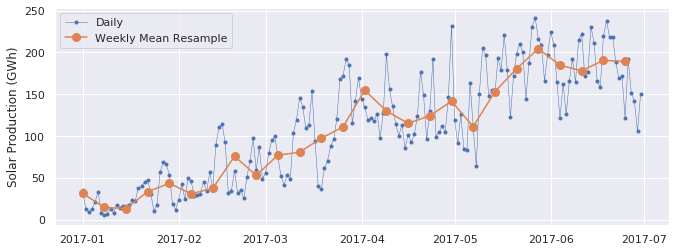

In [45]:
#  Plot the daily and weekly Solar time series together over a single six-month period to compare them.
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(ospd.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(ospd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.

In [46]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
opsd_monthly = ospd[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN


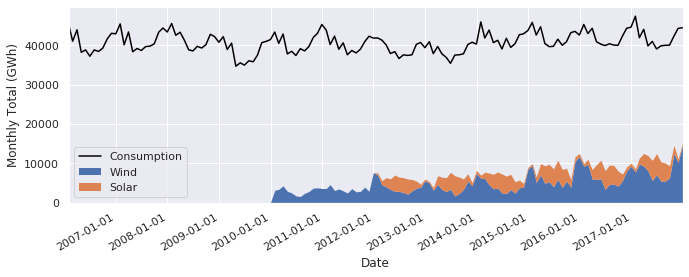

In [47]:
# explore the monthly time series by plotting the electricity consumption as a line plot, 
# and the wind and solar power production together as a stacked area plot.
fig, ax = plt.subplots()
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

We can clearly see the yearly seasonality in each time series, and it is also evident that electricity consumption has been fairly stable over time, while wind power production has been growing steadily, with wind + solar power comprising an increasing share of the electricity consumed.

In [48]:
# Explore this further by resampling to annual frequency and 
# computing the ratio of Wind+Solar to Consumption for each year.
#
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
opsd_annual = ospd[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


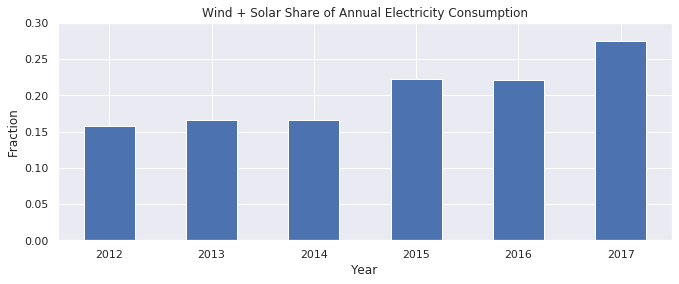

In [49]:
#  Let’s plot the wind + solar share of annual electricity consumption as a bar chart.
# Plot from 2012 onwards, because there is no solar production data in earlier years
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0);

We can see that wind + solar production as a share of annual electricity consumption has been increasing from about 15% in 2012 to about 27% in 2017.

## **Rolling windows**

**Rolling window** operations are another important transformation for time series data. Similar to downsampling, rolling windows split the data into time windows and and the data in each window is aggregated with a function such as mean(), median(), sum(), etc.

In [52]:
# Compute the centered 7-day rolling mean
opsd_7d = ospd[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


We can see that the first non-missing rolling mean value is on 2006-01-04, because this is the midpoint of the first rolling window.

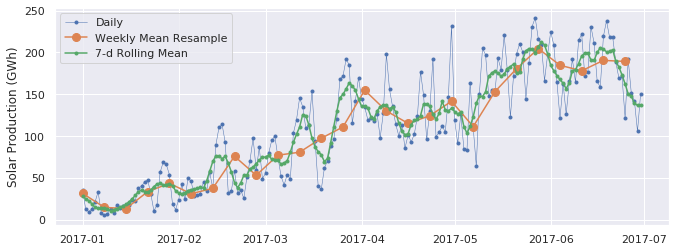

In [53]:
# visualize the differences between rolling mean and resampling
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(ospd.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

## **Trends**

Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these **trends** is with rolling means at different time scales.

A rolling mean tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. This allows lower-frequency variations in the data to be explored. Since our electricity consumption time series has weekly and yearly seasonality, let’s look at rolling means on those two time scales.

In [0]:
# Compute the 365-day rolling mean of our OPSD data.
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = ospd[data_columns].rolling(window=365, center=True, min_periods=360).mean()

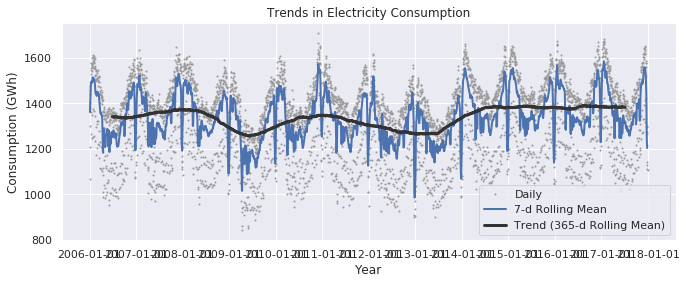

In [54]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(ospd['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

We can see that the 7-day rolling mean has smoothed out all the weekly seasonality, while preserving the yearly seasonality. The 7-day rolling mean reveals that while electricity consumption is typically higher in winter and lower in summer, there is a dramatic decrease for a few weeks every winter at the end of December and beginning of January, during the holidays.

Looking at the 365-day rolling mean time series, we can see that the long-term trend in electricity consumption is pretty flat, with a couple of periods of anomalously low consumption around 2009 and 2012-2013.

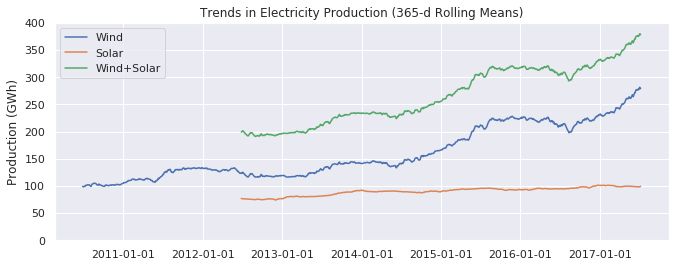

In [55]:
#  Trends in wind and solar production
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)');

We can see a small increasing trend in solar power production and a large increasing trend in wind power production, as Germany continues to expand its capacity in those sectors.